data ready
1825


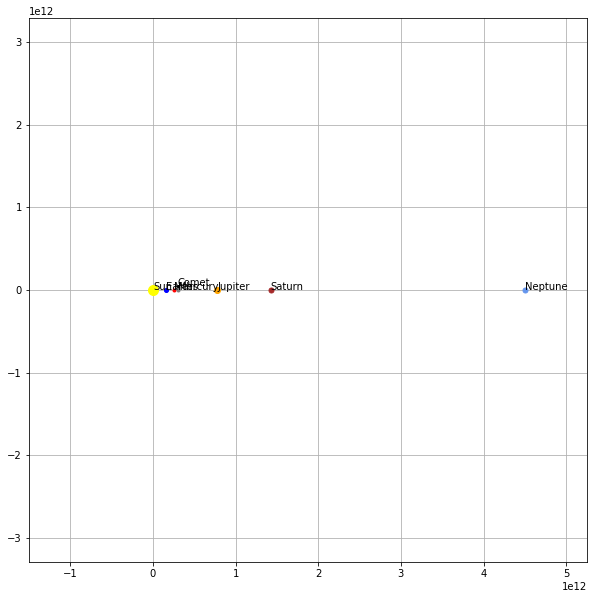

<Figure size 3.78e+14x3.78e+14 with 0 Axes>

In [1]:
#%% 
G           = 6.67e-11
Mb          = 4.0e30                    # black hole
Ms          = 2.0e30                    # sun
Me          = 5.972e24                  # earth        
Mm          = 6.39e23                   # mars
Mc          = 6.39e20                   # unknown comet

Mj          = 1.89813e27                # Jupiter
Msat        = 5.683e26                  # Mars

Mn          = 1.024e26                  # neptune

M_Mercury   = 3.285e23                  # Mercury

AU          = 1.5e11
daysec      = 24.0*60*60

e_ap_v      = 29290                     # earth velocity at aphelion
m_ap_v      = 21970                     # mars velocity at aphelion
commet_v    = 7000

j_ap_v      = 12440                     # jupiter velocity at aphelion
s_ap_v      = 9140                      # saturn velocity at aphelion

n_ap_v      = 4559                      # neptune veloctiy at aphelion

merc_ap_v   = 38860

gravconst_e = G*Me*Ms
gravconst_m = G*Mm*Ms
gravconst_c = G*Mc*Ms

gravconst_j = G*Mj*Ms
gravconst_sat = G*Msat*Ms

gravconst_n = G*Mn*Ms

gravconst_merc = G*M_Mercury*Ms

# setup the starting conditions
# earth
xe,ye,ze    = 1.0167*AU,0,0
xve,yve,zve = 0,e_ap_v,0

# mars
xm,ym,zm    = 1.666*AU,0,0
xvm,yvm,zvm = 0,m_ap_v,0

# comet
xc,yc,zc    = 2*AU,0.3*AU,0
xvc,yvc,zvc = 0,commet_v,0

# sun
xs,ys,zs    = 0,0,0
xvs,yvs,zvs = 0,0,0

# Jupiter
xj,yj,zj = 5.2*AU, 0,0
xvj,yvj,zvj = 0,j_ap_v,0


# Saturn
xsat,ysat,zsat = 9.5*AU,0,0
xvsat,yvsat,zvsat = 0,s_ap_v,0

# neptune
xn, yn, zn    = 30*AU,0,0
xvn, yvn, zvn = 0,n_ap_v,0

#Mercury
x_merc, y_merc, z_merc = 2.056*AU, 0, 0
xv_merc, yv_merc, zv_merc = 0, merc_ap_v, 0


t           = 0.0
dt          = 1*daysec # every frame move this time

xelist,yelist,zelist = [],[],[]
xslist,yslist,zslist = [],[],[]
xmlist,ymlist,zmlist = [],[],[]
xclist,yclist,zclist = [],[],[]

xjlist,yjlist,zjlist = [],[],[]
xsatlist,ysatlist,zsatlist = [],[],[]

xnlist,ynlist,znlist = [],[],[]

xmerclist, ymerclist, zmerclist = [], [], []

# start simulation
while t<5*365*daysec:
    ################ earth #############
    # compute G force on earth
    #rx,ry,rz = xs - xe, ys - ye, zs - ze
    rx,ry,rz = xe - xs, ye - ys, ze - zs
    modr3_e = (rx**2+ry**2+rz**2)**1.5
    fx_e = -gravconst_e*rx/modr3_e
    fy_e = -gravconst_e*ry/modr3_e
    fz_e = -gravconst_e*rz/modr3_e
    
    # update quantities how is this calculated?  F = ma -> a = F/m
    xve += fx_e*dt/Me
    yve += fy_e*dt/Me
    zve += fz_e*dt/Me
    
    # update position
    xe += xve*dt
    ye += yve*dt 
    ze += zve*dt
    
    # save the position in list
    xelist.append(xe)
    yelist.append(ye)
    zelist.append(ze)
    
    ################ Mars ##############
    # compute G force on mars
    rx_m,ry_m,rz_m = xm - xs, ym - ys, zm - zs
    modr3_m = (rx_m**2+ry_m**2+rz_m**2)**1.5
    fx_m = -gravconst_m*rx_m/modr3_m
    fy_m = -gravconst_m*ry_m/modr3_m
    fz_m = -gravconst_m*rz_m/modr3_m
    
    xvm += fx_m*dt/Mm
    yvm += fy_m*dt/Mm
    zvm += fz_m*dt/Mm
    
    # update position
    xm += xvm*dt
    ym += yvm*dt
    zm += zvm*dt
    
    # add to list
    xmlist.append(xm)
    ymlist.append(ym)
    zmlist.append(zm)
    
    ################ comet ##############
    # compute G force on comet
    rx_c,ry_c,rz_c = xc - xs, yc - ys, zc - zs
    modr3_c = (rx_c**2+ry_c**2+rz_c**2)**1.5
    fx_c = -gravconst_c*rx_c/modr3_c
    fy_c = -gravconst_c*ry_c/modr3_c
    fz_c = -gravconst_c*rz_c/modr3_c
    
    xvc += fx_c*dt/Mc
    yvc += fy_c*dt/Mc
    zvc += fz_c*dt/Mc
    
    # update position
    xc += xvc*dt
    yc += yvc*dt 
    zc += zvc*dt
    
    # add to list
    xclist.append(xc)
    yclist.append(yc)
    zclist.append(zc)
    
    
    ################ Jupiter #############
    # compute G force on Jupiter
    
    rx_j,ry_j,rz_j = xj - xs, yj - ys, zj - zs
    modr3_j = (rx_j**2+ry_j**2+rz_j**2)**1.5
    fx_j = -gravconst_j*rx_j/modr3_j
    fy_j = -gravconst_j*ry_j/modr3_j
    fz_j = -gravconst_j*rz_j/modr3_j
    
    # update quantities how is this calculated?  F = ma -> a = F/m
    xvj += fx_j*dt/Mj
    yvj += fy_j*dt/Mj
    zvj += fz_j*dt/Mj
    
    # update position
    xj += xvj*dt
    yj += yvj*dt 
    zj += zvj*dt
    
    # save the position in list
    xjlist.append(xj)
    yjlist.append(yj)
    zjlist.append(zj)
    
    
    ################ Saturn #############
    # compute G force on Saturn
  
    rx_sat,ry_sat,rz_sat = xsat - xs, ysat - ys, zsat - zs
    modr3_sat = (rx_sat**2+ry_sat**2+rz_sat**2)**1.5
    fx_sat = -gravconst_sat*rx_sat/modr3_sat
    fy_sat = -gravconst_sat*ry_sat/modr3_sat
    fz_sat = -gravconst_sat*rz_sat/modr3_sat
    
    # update quantities how is this calculated?  F = ma -> a = F/m
    xvsat += fx_sat*dt/Msat
    yvsat += fy_sat*dt/Msat
    zvsat += fz_sat*dt/Msat
    
    # update position
    xsat += xvsat*dt
    ysat += yvsat*dt 
    zsat += zvsat*dt
    
    # save the position in list
    xsatlist.append(xsat)
    ysatlist.append(ysat)
    zsatlist.append(zsat)
    
     ########## Neptune ################
    # compute G force on Neptune
    
    
    rx_n,ry_n,rz_n = xn - xs, yn - ys, zn - zs
    modr3_n = (rx_n**2+ry_n**2+rz_n**2)**1.5
    fx_n = -gravconst_e*rx_n/modr3_n
    fy_n = -gravconst_e*ry_n/modr3_n
    fz_n = -gravconst_e*rz_n/modr3_n
    
     # update quantities how is this calculated?  F = ma -> a = F/m
    xvn += fx_n*dt/Mn
    yvn += fy_n*dt/Mn
    zvn += fz_n*dt/Mn
    
    # update position
    xn += xvn*dt
    yn += yvn*dt 
    zn += zvn*dt
    
    # save the position in list
    xnlist.append(xn)
    ynlist.append(yn)
    znlist.append(zn)
    
         ################ Mercury ##############
    # compute G force on mercury
    rx_merc,ry_merc,rz_merc = x_merc - xs, y_merc - ys, z_merc - zs
    modr3_merc = (rx_merc**2+ry_merc**2+rz_merc**2)**1.5
    fx_merc = -gravconst_m*rx_merc/modr3_merc
    fy_merc = -gravconst_m*ry_merc/modr3_merc
    fz_merc = -gravconst_m*rz_merc/modr3_merc
    
    xv_merc += fx_merc*dt/Mm
    yv_merc += fy_merc*dt/Mm
    zv_merc += fz_merc*dt/Mm
    
    # update position
    x_merc += xv_merc*dt
    y_merc += yv_merc*dt
    z_merc += zv_merc*dt
    
    # add to list
    xmerclist.append(x_merc)
    ymerclist.append(y_merc)
    zmerclist.append(z_merc)
    
    ################ the sun ###########
    # update quantities how is this calculated?  F = ma -> a = F/m
    xvs += -(fx_e+fx_m)*dt/Ms
    yvs += -(fy_e+fy_m)*dt/Ms
    zvs += -(fz_e+fz_m)*dt/Ms
    
    # update position
    xs += xvs*dt
    ys += yvs*dt 
    zs += zvs*dt
    xslist.append(xs)
    yslist.append(ys)
    zslist.append(zs)
    
    # update dt
    t +=dt

print('data ready')
#print(xalist,yalist)

#%% plot it 
import matplotlib.pyplot as plt
from matplotlib import animation
import matplotlib
matplotlib.rcParams['animation.embed_limit'] = 2**128
#matplotlib.use("TkAgg") # for mac M1
from IPython.display import HTML

fig, ax = plt.subplots(figsize=(10,10))
ax.set_aspect('equal')
ax.grid()

line_e,     = ax.plot([],[],'-g',lw=1)
point_e,    = ax.plot([AU], [0], marker="o", markersize=4, markeredgecolor="blue", markerfacecolor="blue")
text_e      = ax.text(AU,0,'Earth')

line_m,     = ax.plot([],[],'-g',lw=1)
point_m,    = ax.plot([1.666*AU], [0], marker="o", markersize=3, markeredgecolor="red", markerfacecolor="red")
text_m      = ax.text(1.666*AU,0,'Mars')

line_c,     = ax.plot([],[],'-g',lw=1)
point_c,    = ax.plot([2*AU], [0], marker="o", markersize=2, markeredgecolor="black", markerfacecolor="black")
text_c      = ax.text(2*AU,0,'Comet')

line_j,     = ax.plot([],[],'-g',lw=1)
point_j,    = ax.plot([5.2*AU], [0], marker="o", markersize=6, markeredgecolor="orange", markerfacecolor="orange")
text_j      = ax.text(5.2*AU,0,'Jupiter')

line_sat,     = ax.plot([],[],'-g',lw=1)
point_sat,    = ax.plot([9.5*AU], [0], marker="o", markersize=5, markeredgecolor="brown", markerfacecolor="brown")
text_sat      = ax.text(9.5*AU,0,'Saturn')

line_n,     = ax.plot([],[],'-g',lw=1)
point_n,    = ax.plot([30*AU], [0], marker="o", markersize=5, markeredgecolor="cornflowerblue", markerfacecolor="cornflowerblue")
text_n      = ax.text(30*AU,0,'Neptune')

line_merc,     = ax.plot([],[],'-g',lw=1)
point_merc,    = ax.plot([2.056*AU], [0], marker="o", markersize=3, markeredgecolor="grey", markerfacecolor="grey")
text_merc      = ax.text(2.056*AU,0,'Mercury')

point_s,    = ax.plot([0], [0], marker="o", markersize=10, markeredgecolor="yellow", markerfacecolor="yellow")
text_s      = ax.text(0,0,'Sun')

exdata,eydata = [],[]                   # earth track
sxdata,sydata = [],[]                   # sun track
mxdata,mydata = [],[]                   # mars track
cxdata,cydata = [],[]

jxdata,jydata = [],[]                   # jupiter track
satxdata,satydata = [],[]               # saturn track

nxdata,nydata = [],[]                   # neptune track

merc_xdata, merc_ydata = [], []

print(len(xelist))

def update(i):
    exdata.append(xelist[i])
    eydata.append(yelist[i])
    
    mxdata.append(xmlist[i])
    mydata.append(ymlist[i])
    
    cxdata.append(xclist[i])
    cydata.append(yclist[i])
    
    jxdata.append(xjlist[i])
    jydata.append(yjlist[i])
    
    satxdata.append(xsatlist[i])
    satydata.append(ysatlist[i])
    
    nxdata.append(xnlist[i])
    nydata.append(ynlist[i])
    
    merc_xdata.append(xmerclist[i])
    merc_ydata.append(ymerclist[i])
    
    line_e.set_data(exdata,eydata)
    point_e.set_data(xelist[i],yelist[i])
    text_e.set_position((xelist[i],yelist[i]))
    
    line_m.set_data(mxdata,mydata)
    point_m.set_data(xmlist[i],ymlist[i])
    text_m.set_position((xmlist[i],ymlist[i]))
    
    line_c.set_data(cxdata,cydata)
    point_c.set_data(xclist[i],yclist[i])
    text_c.set_position((xclist[i],yclist[i]))
    
    line_j.set_data(jxdata,jydata)
    point_j.set_data(xjlist[i],yjlist[i])
    text_j.set_position((xjlist[i],yjlist[i]))
    
    line_sat.set_data(satxdata,satydata)
    point_sat.set_data(xsatlist[i],ysatlist[i])
    text_sat.set_position((xsatlist[i],ysatlist[i]))
    
    line_n.set_data(nxdata,nydata)
    point_n.set_data(xnlist[i],ynlist[i])
    text_n.set_position((xnlist[i],ynlist[i]))
    
    line_merc.set_data(merc_xdata,merc_ydata)
    point_merc.set_data(xmerclist[i],ymerclist[i])
    text_merc.set_position((xmerclist[i],ymerclist[i]))
    
    point_s.set_data(xslist[i],yslist[i])
    text_s.set_position((xslist[i],yslist[i]))
    
    ax.axis('equal')
    ax.set_xlim(-10*AU,35*AU)
    ax.set_ylim(-10*AU,10*AU)
    #print(i)
    return line_e,point_s,point_e,line_m,point_m,text_e,text_m,text_s,line_c,point_c,text_c,line_j,point_j,text_j,line_sat,point_sat,text_sat,line_n,point_n,text_n,line_merc,point_merc,text_merc   

plt.figure(figsize=(35*AU,35*AU))
anim = animation.FuncAnimation(fig,func=update,frames=len(xelist),interval=1,blit=True)
plt.show()

#%% to show in Jupyter Notebook 
# from IPython.display import HTML
# HTML(anim.to_jshtml())